In [10]:
import numpy as np 
# --- centralms --- 
from centralms import util as UT
from centralms import abcee as ABC
from centralms import catalog as Cat
from centralms import evolver as Evo
from centralms import observables as Obvs

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

(1e-06, 0.1)

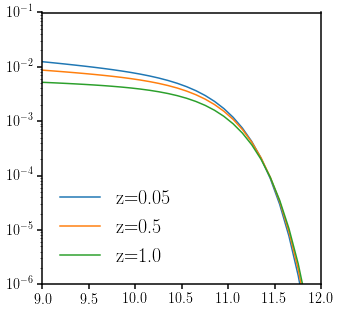

In [7]:
fig = plt.figure(figsize=(5,5)) 
sub = fig.add_subplot(111)
for z in [0.05, 0.5, 1.]: 
    m, phi = Obvs.analyticSMF(z, source='li-march')
    sub.plot(m, phi, label='z='+str(z))
sub.legend(loc='lower left', fontsize=20)
sub.set_yscale('log')
sub.set_xlim(9., 12.)
sub.set_ylim([1e-6, 1e-1])

In [25]:
censub = Cat.CentralSubhalos()
shcat = censub.Read()

(1e-06, 0.1)

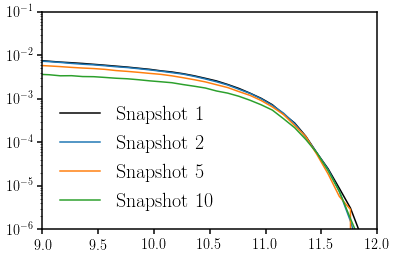

In [9]:
fig = plt.figure()
sub = fig.add_subplot(111)
m, phi = Obvs.getMF(shcat['m.sham'])
sub.plot(m, phi, c='k', label='Snapshot 1')
for i in [2, 5, 10]: 
    m, phi = Obvs.getMF(shcat['m.sham.snap'+str(i)])
    sub.plot(m, phi, label="Snapshot "+str(i))
sub.legend(loc='lower left', fontsize=20)
sub.set_yscale('log')
sub.set_xlim(9., 12.)
sub.set_ylim([1e-6, 1e-1])

(1e-06, 0.1)

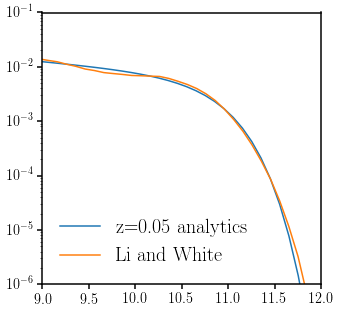

In [12]:
fig = plt.figure(figsize=(5,5)) 
sub = fig.add_subplot(111)
m, phi = Obvs.analyticSMF(0.05, source='li-march')
sub.plot(m, phi, label='z=0.05 analytics')
marr, phi, phierr = Obvs.dataSMF(source='li-white')
sub.plot(marr, phi, label='Li and White')
sub.legend(loc='lower left', fontsize=20)
sub.set_yscale('log')
sub.set_xlim(9., 12.)
sub.set_ylim([1e-6, 1e-1])

(1e-06, 0.1)

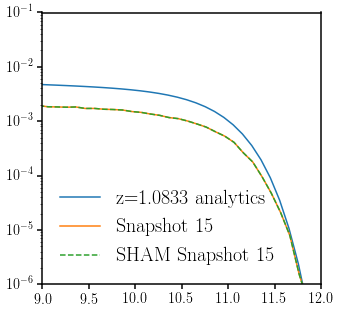

In [32]:
fig = plt.figure(figsize=(5,5)) 
sub = fig.add_subplot(111)
m, phi = Obvs.analyticSMF(UT.z_nsnap(15), source='li-march')
sub.plot(m, phi, label='z='+str(UT.z_nsnap(15))+' analytics')
start = (shcat['nsnap_start'] == 15)
m, phi = Obvs.getMF(shcat['m.star0'][start])
sub.plot(m, phi, label='Snapshot 15')
m, phi = Obvs.getMF(shcat['m.sham.snap15'])
sub.plot(m, phi, ls='--', label='SHAM Snapshot 15')
sub.legend(loc='lower left', fontsize=20)
sub.set_yscale('log')
sub.set_xlim(9., 12.)
sub.set_ylim([1e-6, 1e-1])

(1e-06, 0.1)

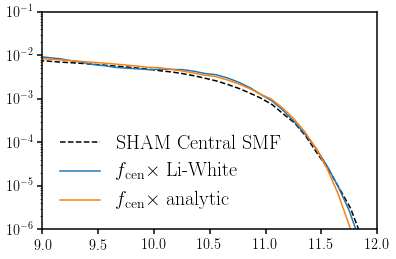

In [15]:
fig = plt.figure()
sub = fig.add_subplot(111)
m, phi = Obvs.getMF(shcat['m.sham'])
sub.plot(m, phi, c='k', ls='--', label='SHAM Central SMF')
marr, phi, phierr = Obvs.dataSMF(source='li-white')
phi *= (1. - np.array([Obvs.f_sat(mm, 0.05) for mm in marr])) # sallite fraction
sub.plot(marr, phi, label=r'$f_\mathrm{cen} \times$ Li-White')
m, phi = Obvs.analyticSMF(0.05, source='li-march')
phi *= (1. - np.array([Obvs.f_sat(mm, 0.05) for mm in m])) # sallite fraction
sub.plot(m, phi, label=r'$f_\mathrm{cen} \times$ analytic')
sub.legend(loc='lower left', fontsize=20)
sub.set_yscale('log')
sub.set_xlim(9., 12.)
sub.set_ylim([1e-6, 1e-1])